In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\shahd\OneDrive - Northeastern University\Documents\MPS ANALYTICS\Winter Q3\ALY 6020\Projects\Week 4\week 4 - Nashville_housing_data.csv",skipinitialspace = True)

In [3]:
df

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,56602,176 01 0 003.00,SINGLE FAMILY,4617 ROCKLAND TRL,NaN,ANTIOCH,10/13/2016,20161019-0110290,No,No,...,105000,1758.00000,CRAWL,1996,BRICK/FRAME,C,3.0,2.0,0.0,Over
22647,56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,NaN,ANTIOCH,10/26/2016,20161102-0115842,No,No,...,142400,2421.00000,SLAB,1996,BRICK/FRAME,C,3.0,3.0,0.0,Over
22648,56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,NaN,ANTIOCH,10/28/2016,20161031-0114817,No,No,...,159300,3117.00000,SLAB,1995,BRICK/FRAME,C,3.0,3.0,0.0,Over
22649,56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NaN,NASHVILLE,10/28/2016,20161102-0115988,No,No,...,204100,1637.00000,CRAWL,2004,FRAME,B,3.0,2.0,1.0,Over


## Cleaning and Data Transformations

In [4]:
df = df.drop(['City','Suite/ Condo   #','Unnamed: 0'],axis = 1)

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Parcel ID                          22651 non-null  object 
 1   Land Use                           22651 non-null  object 
 2   Property Address                   22649 non-null  object 
 3   Property City                      22649 non-null  object 
 4   Sale Date                          22651 non-null  object 
 5   Legal Reference                    22651 non-null  object 
 6   Sold As Vacant                     22651 non-null  object 
 7   Multiple Parcels Involved in Sale  22651 non-null  object 
 8   State                              22651 non-null  object 
 9   Acreage                            22651 non-null  float64
 10  Tax District                       22651 non-null  object 
 11  Neighborhood                       22651 non-null  int

In [6]:
df.isnull().sum()

Parcel ID                              0
Land Use                               0
Property Address                       2
Property City                          2
Sale Date                              0
Legal Reference                        0
Sold As Vacant                         0
Multiple Parcels Involved in Sale      0
State                                  0
Acreage                                0
Tax District                           0
Neighborhood                           0
Land Value                             0
Building Value                         0
Finished Area                          1
Foundation Type                        1
Year Built                             0
Exterior Wall                          0
Grade                                  0
Bedrooms                               3
Full Bath                              1
Half Bath                            108
Sale Price Compared To Value           0
dtype: int64

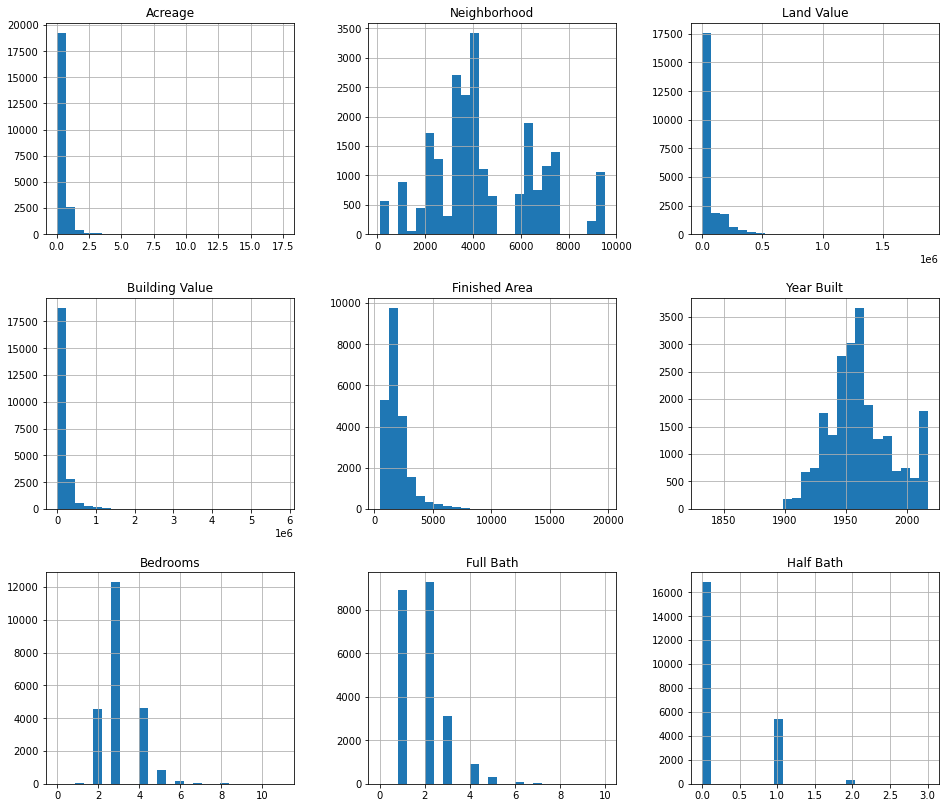

In [7]:
df.hist(figsize=(16,14),bins=25);

In [8]:
mode1 = df['Foundation Type'].mode().values[0]
df['Foundation Type'].fillna(value=mode1,inplace = True )
df['Half Bath'] = df['Half Bath'].fillna(df['Half Bath'].median())
df['Full Bath'] = df['Full Bath'].fillna(df['Full Bath'].median())
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median())
df['Finished Area'] = df['Finished Area'].fillna(df['Finished Area'].median())


In [9]:
df[df['Property City'].isna()]

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
17529,116 04 0 118.00,SINGLE FAMILY,NaN,NaN,2/4/2016,20160205-0011565,No,No,TN,0.32,...,501100,4420.0,CRAWL,2016,BRICK/FRAME,B,5.0,4.0,1.0,Under
17696,072 15 0 176.00,SINGLE FAMILY,NaN,NaN,2/24/2016,20160229-0018961,No,No,TN,0.16,...,283100,2414.0,CRAWL,2016,FRAME,B,4.0,2.0,1.0,Under


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

Parcel ID                            0
Land Use                             0
Property Address                     0
Property City                        0
Sale Date                            0
Legal Reference                      0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
State                                0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
Sale Price Compared To Value         0
dtype: int64

In [12]:
df.head()

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,1/11/2013,20130118-0006337,No,No,TN,0.17,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,1/18/2013,20130124-0008033,No,No,TN,0.11,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,1/18/2013,20130128-0008863,No,No,TN,0.17,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,1/23/2013,20130131-0009929,No,No,TN,0.34,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,1/4/2013,20130118-0006110,No,No,TN,0.17,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [13]:
df = df.astype({"Bedrooms":'int', "Full Bath":'int',"Half Bath":'int'}) 

In [14]:
print("Land Use \n ", df['Land Use'].value_counts())
print("\n Foundation Type \n ", df['Foundation Type'].value_counts())
print("\n Exterior Wall \n ",df['Exterior Wall'].value_counts())
print("\n Grade \n ",df['Grade'].value_counts())

Land Use 
  SINGLE FAMILY             21388
DUPLEX                     1190
RESIDENTIAL COMBO/MISC       37
QUADPLEX                     34
Name: Land Use, dtype: int64

 Foundation Type 
  CRAWL        14209
FULL BSMT     3823
PT BSMT       3146
SLAB          1431
PIERS           36
TYPICAL          4
Name: Foundation Type, dtype: int64

 Exterior Wall 
  BRICK          11547
FRAME           8170
BRICK/FRAME     2221
STONE            329
STUCCO           156
FRAME/STONE      104
CONC BLK          99
LOG               15
METAL              8
Name: Exterior Wall, dtype: int64

 Grade 
  C       16235
B        3393
D        1929
A         549
X         482
E          57
SSC         1
OFC         1
AAB         1
OFB         1
Name: Grade, dtype: int64


In [15]:
df['Grade'] = df['Grade'].replace({'SSC': 'MISC', 'OFC': 'MISC', 'AAB':'MISC', 'OFB':'MISC'},regex=True)

In [16]:
print("\n Grade \n ",df['Grade'].value_counts())


 Grade 
  C        16235
B         3393
D         1929
A          549
X          482
E           57
MISC         4
Name: Grade, dtype: int64


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Acreage,22649.0,0.454724,0.611842,0.04,0.2,0.28000,0.46,1.750000e+01
Neighborhood,22649.0,4432.803832,2142.876539,107.00,3130.0,4026.00000,6229.00,9.530000e+03
Land Value,22649.0,70133.345225,102902.792233,900.00,22000.0,30000.00000,60300.00,1.869000e+06
Building Value,22649.0,172220.807762,189636.794813,1400.00,85500.0,118800.00000,188200.00,5.824300e+06
Finished Area,22649.0,1915.232650,1078.986388,450.00,1250.0,1645.64999,2213.00,1.972825e+04
Year Built,22649.0,1961.942911,25.840057,1832.00,1947.0,1959.00000,1977.00,2.017000e+03
Bedrooms,22649.0,3.104773,0.829153,0.00,3.0,3.00000,4.00,1.100000e+01
Full Bath,22649.0,1.887191,0.951137,0.00,1.0,2.00000,2.00,1.000000e+01
Half Bath,22649.0,0.268886,0.479373,0.00,0.0,0.00000,1.00,3.000000e+00


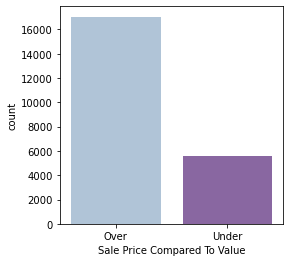

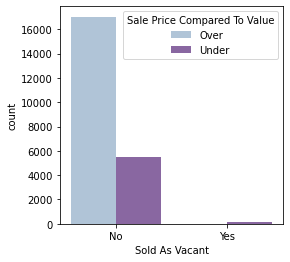

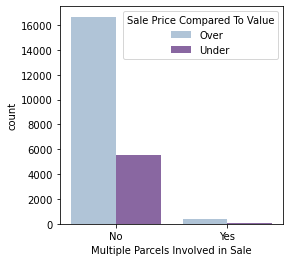

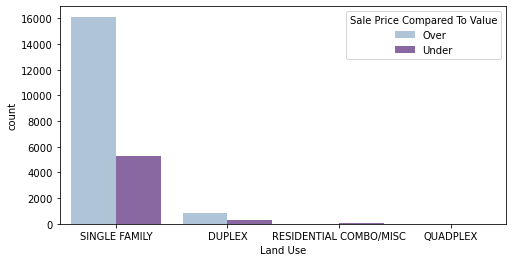

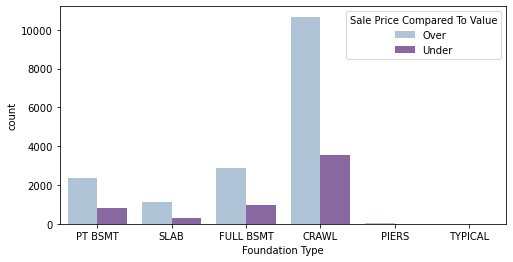

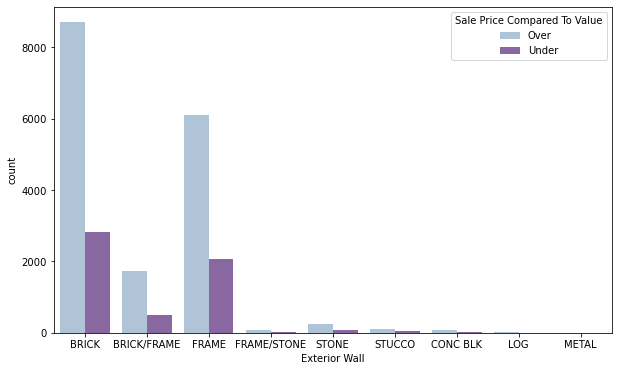

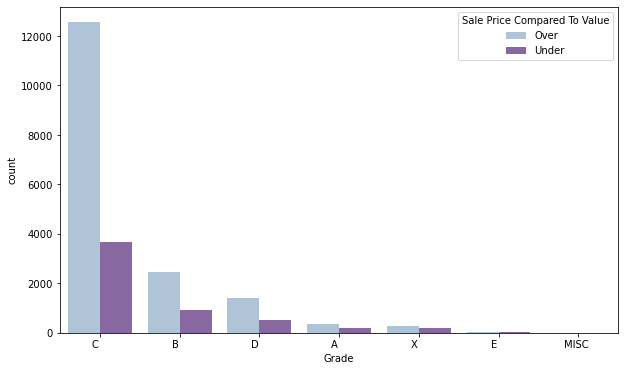

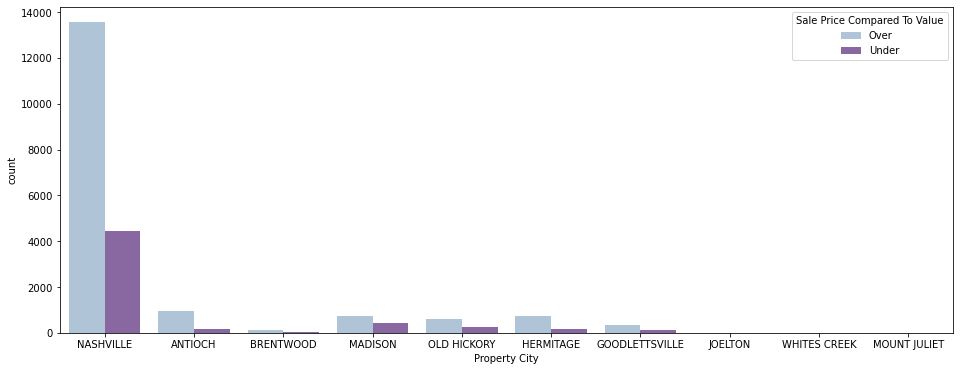

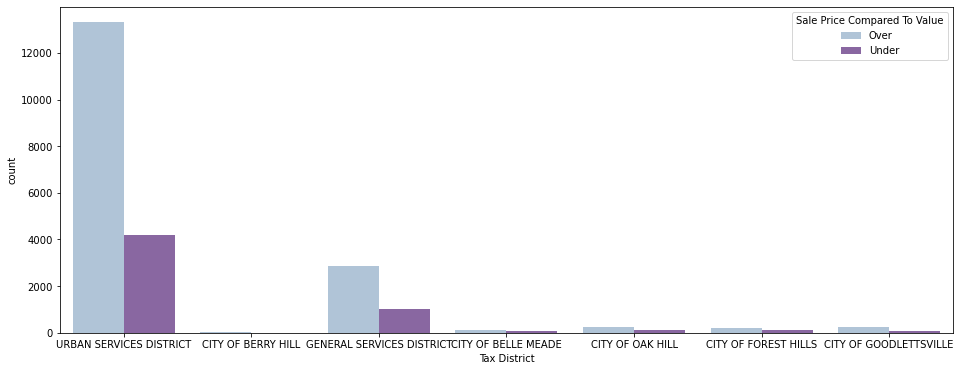

In [18]:
fig , ax = plt.subplots(figsize =(4,4))
sns.countplot(df['Sale Price Compared To Value'], palette = 'BuPu')
plt.show();
fig , ax = plt.subplots(figsize =(4,4))
sns.countplot(df['Sold As Vacant'],hue = df['Sale Price Compared To Value'], palette = 'BuPu')
plt.show();
fig , ax = plt.subplots(figsize =(4,4))
sns.countplot(df['Multiple Parcels Involved in Sale'],hue = df['Sale Price Compared To Value'], palette = 'BuPu')
plt.show();
fig , ax = plt.subplots(figsize =(8,4))
sns.countplot(df['Land Use'],hue = df['Sale Price Compared To Value'], palette = 'BuPu')
plt.show();
fig , ax = plt.subplots(figsize =(8,4))
sns.countplot(df['Foundation Type'],hue = df['Sale Price Compared To Value'], palette = 'BuPu')
plt.show();
fig , ax = plt.subplots(figsize =(10,6))
sns.countplot(df['Exterior Wall'],hue = df['Sale Price Compared To Value'], palette = 'BuPu')
plt.show();
fig , ax = plt.subplots(figsize =(10,6))
sns.countplot(df['Grade'],hue = df['Sale Price Compared To Value'], palette = 'BuPu')
plt.show();
fig , ax = plt.subplots(figsize =(16,6))
sns.countplot(df['Property City'],hue = df['Sale Price Compared To Value'], palette = 'BuPu')
plt.show();
fig , ax = plt.subplots(figsize =(16,6))
sns.countplot(df['Tax District'],hue = df['Sale Price Compared To Value'], palette = 'BuPu')
plt.show();


In [19]:
l1 = ['Land Use','Foundation Type','Exterior Wall','Grade','Property City','Tax District','Sale Price Compared To Value']
for i in range (len(l1)) :
    a = df[l1[i]].unique()
    d = {a[j]: j for j in range(len(a))}
    if l1[i] == 'Sale Price Compared To Value':
        col_name= l1[i]
    else:
        col_name = "%s_new"%(l1[i])
    df[col_name]=df[l1[i]].map(d)
    print(l1[i], ": \n" ,d)

Land Use : 
 {'SINGLE FAMILY': 0, 'DUPLEX': 1, 'RESIDENTIAL COMBO/MISC': 2, 'QUADPLEX': 3}
Foundation Type : 
 {'PT BSMT': 0, 'SLAB': 1, 'FULL BSMT': 2, 'CRAWL': 3, 'PIERS': 4, 'TYPICAL': 5}
Exterior Wall : 
 {'BRICK': 0, 'BRICK/FRAME': 1, 'FRAME': 2, 'FRAME/STONE': 3, 'STONE': 4, 'STUCCO': 5, 'CONC BLK': 6, 'LOG': 7, 'METAL': 8}
Grade : 
 {'C   ': 0, 'B   ': 1, 'D   ': 2, 'A   ': 3, 'X   ': 4, 'E   ': 5, 'MISC ': 6}
Property City : 
 {'NASHVILLE': 0, 'ANTIOCH': 1, 'BRENTWOOD': 2, 'MADISON': 3, 'OLD HICKORY': 4, 'HERMITAGE': 5, 'GOODLETTSVILLE': 6, 'JOELTON': 7, 'WHITES CREEK': 8, 'MOUNT JULIET': 9}
Tax District : 
 {'URBAN SERVICES DISTRICT': 0, 'CITY OF BERRY HILL': 1, 'GENERAL SERVICES DISTRICT': 2, 'CITY OF BELLE MEADE': 3, 'CITY OF OAK HILL': 4, 'CITY OF FOREST HILLS': 5, 'CITY OF GOODLETTSVILLE': 6}
Sale Price Compared To Value : 
 {'Over': 0, 'Under': 1}


In [20]:
df.head()

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,State,Acreage,...,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,Land Use_new,Foundation Type_new,Exterior Wall_new,Grade_new,Property City_new,Tax District_new
0,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,1/11/2013,20130118-0006337,No,No,TN,0.17,...,2,1,0,0,0,0,0,0,0,0
1,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,1/18/2013,20130124-0008033,No,No,TN,0.11,...,3,2,1,0,0,1,1,0,0,1
2,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,1/18/2013,20130128-0008863,No,No,TN,0.17,...,4,2,0,1,0,2,1,1,0,0
3,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,1/23/2013,20130131-0009929,No,No,TN,0.34,...,2,1,0,1,0,3,2,0,0,0
4,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,1/4/2013,20130118-0006110,No,No,TN,0.17,...,2,1,0,1,0,3,2,0,0,0


In [21]:
df = pd.get_dummies(df, columns=['Sold As Vacant','Multiple Parcels Involved in Sale'], drop_first=True)

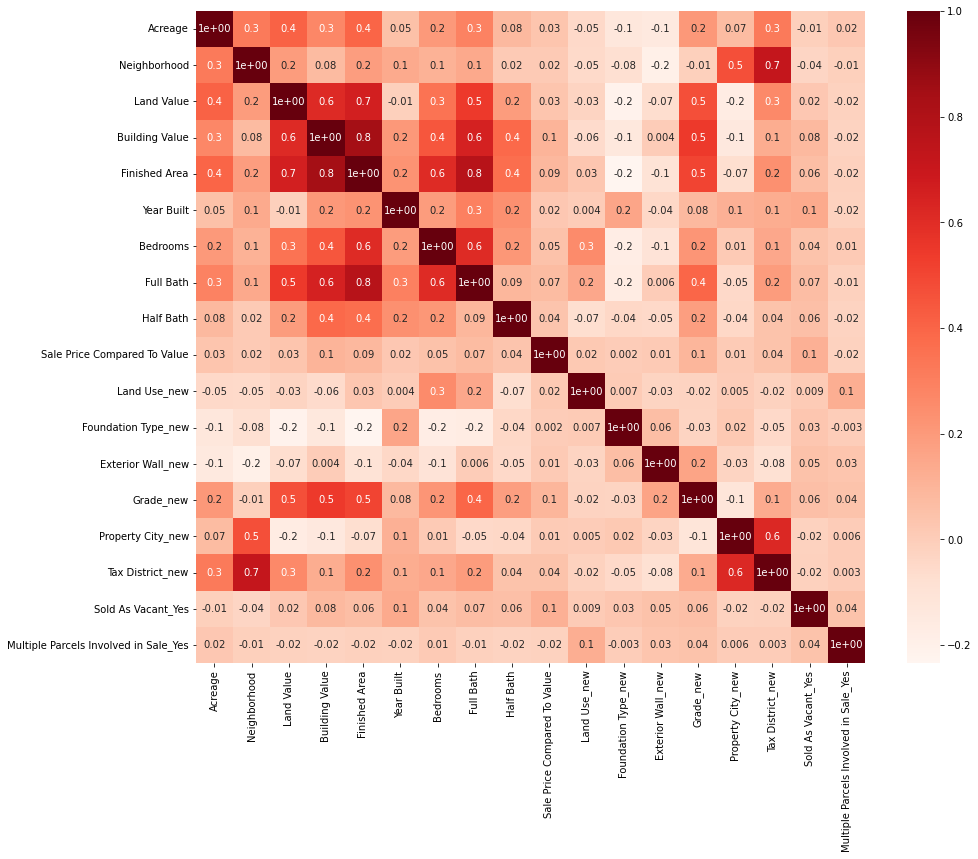

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True,fmt=".1");

## Modelling

### Logistic Regression

In [23]:
y = df[['Sale Price Compared To Value']]
X = df.drop(['Sale Price Compared To Value','Parcel ID','Legal Reference','Sale Date','Property Address','State','Foundation Type','Exterior Wall','Grade'
            ,'Land Use','Property City','Tax District'],axis=1)
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X,y, test_size=0.20,random_state=56)

In [24]:
X

,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath,Land Use_new,Foundation Type_new,Exterior Wall_new,Grade_new,Property City_new,Tax District_new,Sold As Vacant_Yes,Multiple Parcels Involved in Sale_Yes
0,0.17,3127,32000,134400,1149.00000,1941,2,1,0,0,0,0,0,0,0,0,0
1,0.11,9126,34000,157800,2090.82495,2000,3,2,1,0,1,1,0,0,1,0,0
2,0.17,3130,25000,243700,2145.60001,1948,4,2,0,0,2,1,1,0,0,0,0
3,0.34,3130,25000,138100,1969.00000,1910,2,1,0,0,3,2,0,0,0,0,0
4,0.17,3130,25000,86100,1037.00000,1945,2,1,0,0,3,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22646,0.38,6328,25000,105000,1758.00000,1996,3,2,0,0,3,1,0,1,0,0,0
22647,0.27,6328,25000,142400,2421.00000,1996,3,3,0,0,1,1,0,1,0,0,0
22648,0.23,6328,25000,159300,3117.00000,1995,3,3,0,0,1,1,0,1,0,0,0
22649,0.15,126,40000,204100,1637.00000,2004,3,2,1,0,3,2,1,0,0,0,0


In [25]:
m1= sm.Logit(y_trainLR, X_trainLR.astype(float)) 
LRM1 = m1.fit()
print(LRM1.summary())

Optimization terminated successfully.
         Current function value: 0.544297
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                18119
Model:                                    Logit   Df Residuals:                    18102
Method:                                     MLE   Df Model:                           16
Date:                          Mon, 06 Feb 2023   Pseudo R-squ.:                 0.02424
Time:                                  02:35:52   Log-Likelihood:                -9862.1
converged:                                 True   LL-Null:                       -10107.
Covariance Type:                      nonrobust   LLR p-value:                 4.225e-94
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

In [26]:
y_pred1=LRM1.predict(X_testLR).round()
print(confusion_matrix(y_testLR, y_pred1))
print(classification_report(y_testLR, y_pred1))

[[3366   18]
 [1105   41]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.86      3384
           1       0.69      0.04      0.07      1146

    accuracy                           0.75      4530
   macro avg       0.72      0.52      0.46      4530
weighted avg       0.74      0.75      0.66      4530



In [27]:
y = df[['Sale Price Compared To Value']]
X = df.drop(['Sale Price Compared To Value','Parcel ID','Legal Reference','Sale Date','Property Address','State','Foundation Type','Exterior Wall','Grade'
            ,'Land Use','Property City','Tax District','Neighborhood','Finished Area','Bedrooms','Half Bath','Full Bath','Foundation Type_new',
             'Exterior Wall_new','Property City_new','Acreage'],axis=1)
X_trainLR1, X_testLR1, y_trainLR1, y_testLR1 = train_test_split(X,y, test_size=0.20,random_state=56)

In [28]:
m2= sm.Logit(y_trainLR1, X_trainLR1.astype(float)) 
LRM2 = m2.fit()
print(LRM2.summary())

Optimization terminated successfully.
         Current function value: 0.544474
         Iterations 6
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                18119
Model:                                    Logit   Df Residuals:                    18111
Method:                                     MLE   Df Model:                            7
Date:                          Mon, 06 Feb 2023   Pseudo R-squ.:                 0.02392
Time:                                  02:35:52   Log-Likelihood:                -9865.3
converged:                                 True   LL-Null:                       -10107.
Covariance Type:                      nonrobust   LLR p-value:                2.681e-100
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

In [29]:
y_pred2=LRM2.predict(X_testLR1).round()
print(confusion_matrix(y_testLR1, y_pred2))
print(classification_report(y_testLR1, y_pred2))

[[3367   17]
 [1106   40]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.86      3384
           1       0.70      0.03      0.07      1146

    accuracy                           0.75      4530
   macro avg       0.73      0.51      0.46      4530
weighted avg       0.74      0.75      0.66      4530



### Decision Tree Classification

In [30]:
y = df[['Sale Price Compared To Value']]
X = df.drop(['Sale Price Compared To Value','Parcel ID','Legal Reference','Sale Date','Property Address','State','Foundation Type','Exterior Wall','Grade'
            ,'Land Use','Property City','Tax District'],axis=1)
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X,y, test_size=0.20,random_state=56)

In [31]:
DT1 = DecisionTreeClassifier(random_state=42,max_depth=4)
DTM1 = DT1.fit(X_trainDT,y_trainDT)

In [32]:
y_predDT = DTM1.predict(X_testDT)
print(confusion_matrix(y_testDT, y_predDT))
print(classification_report(y_testDT, y_predDT))

[[3375    9]
 [1106   40]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3384
           1       0.82      0.03      0.07      1146

    accuracy                           0.75      4530
   macro avg       0.78      0.52      0.46      4530
weighted avg       0.77      0.75      0.66      4530



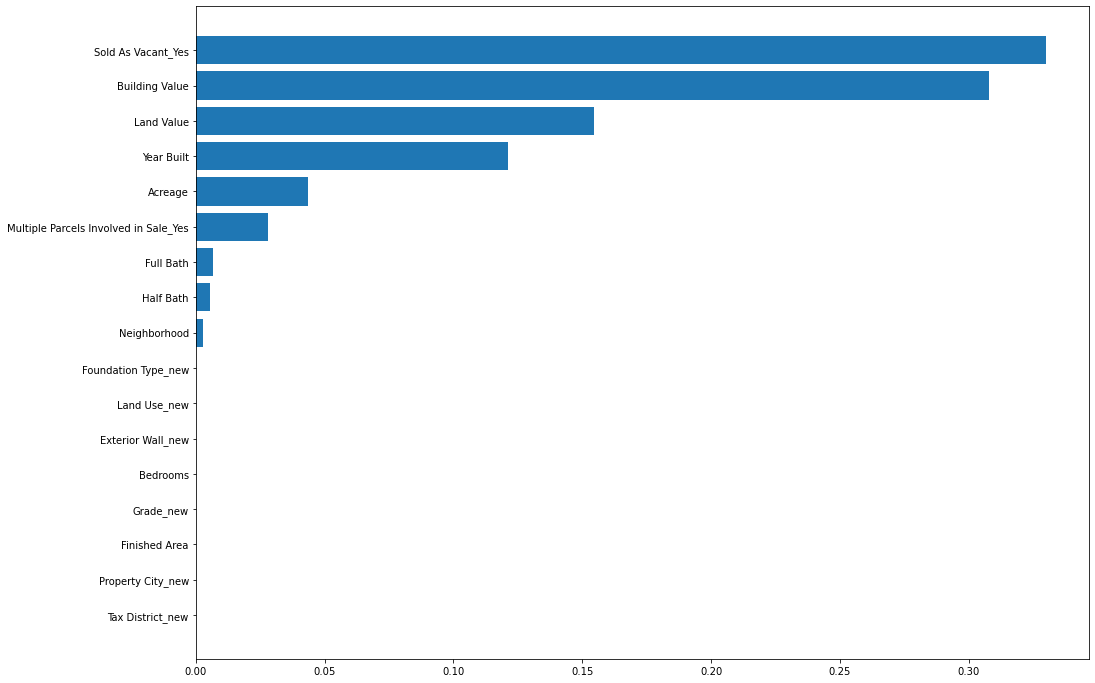

In [33]:
importances = DTM1.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize =(16,12))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_trainDT.columns)[indices])

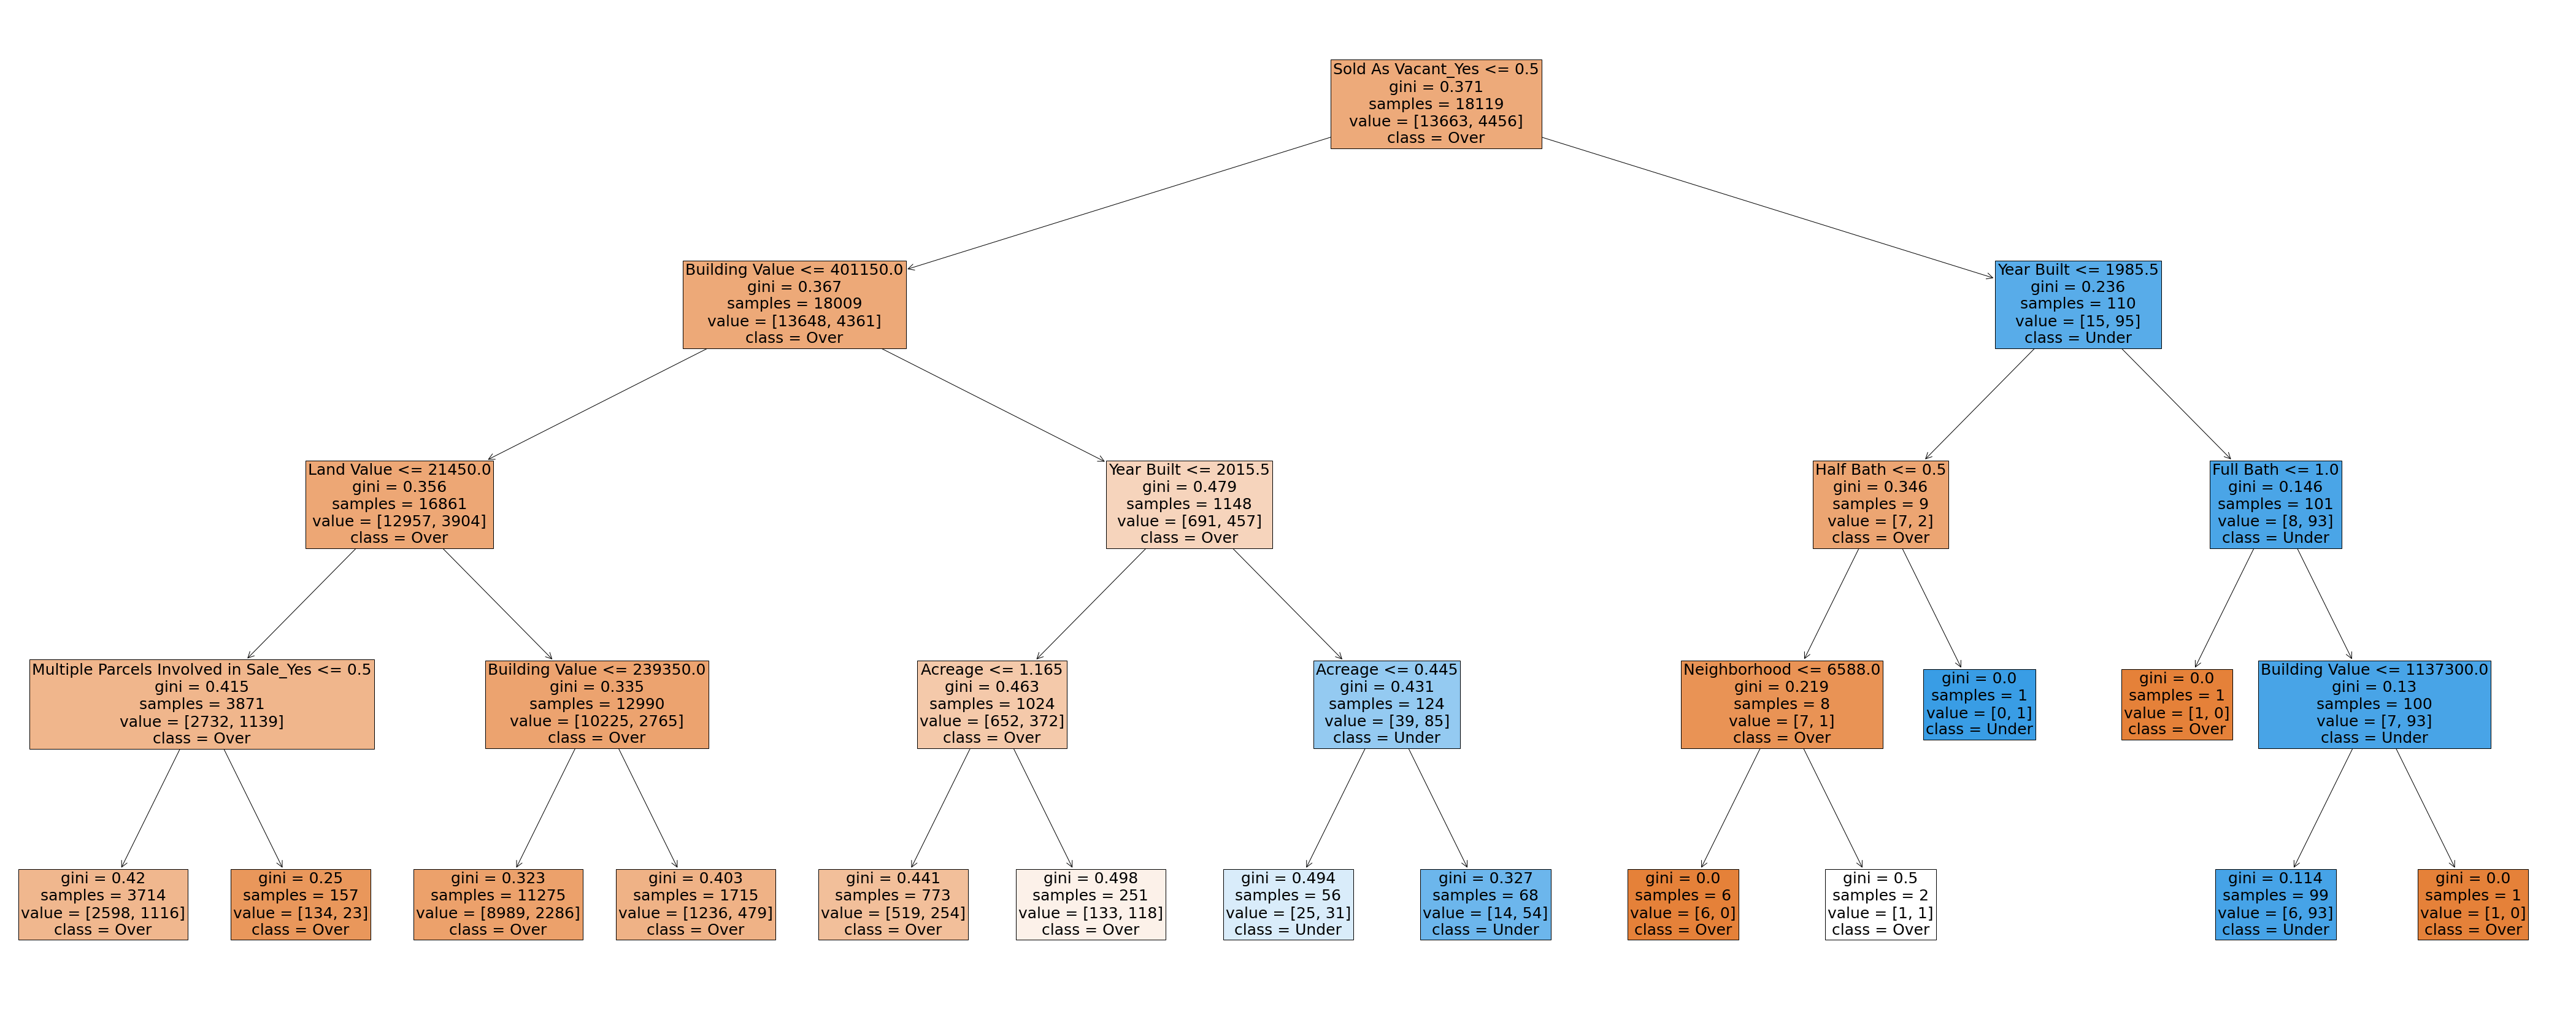

In [34]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(75,30))
_= tree.plot_tree(DTM1,
                 feature_names = X_trainDT.columns,
                 class_names = {0 : 'Over', 1:'Under'},
                 filled=True,
                 fontsize = 25)

### Random Forest

In [35]:
y = df[['Sale Price Compared To Value']]
X = df.drop(['Sale Price Compared To Value','Parcel ID','Legal Reference','Sale Date','Property Address','State','Foundation Type','Exterior Wall','Grade'
            ,'Land Use','Property City','Tax District'],axis=1)
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X,y, test_size=0.20,random_state=56)

In [36]:
RFM = RandomForestClassifier(random_state=42,max_depth=4)   
RFM.fit(X_trainRF,y_trainRF)

RandomForestClassifier(max_depth=4, random_state=42)

In [37]:
y_predRD = RFM.predict(X_testRF)
print(confusion_matrix(y_testRF, y_predRD))
print(classification_report(y_testRF, y_predRD))

[[3377    7]
 [1118   28]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3384
           1       0.80      0.02      0.05      1146

    accuracy                           0.75      4530
   macro avg       0.78      0.51      0.45      4530
weighted avg       0.76      0.75      0.65      4530



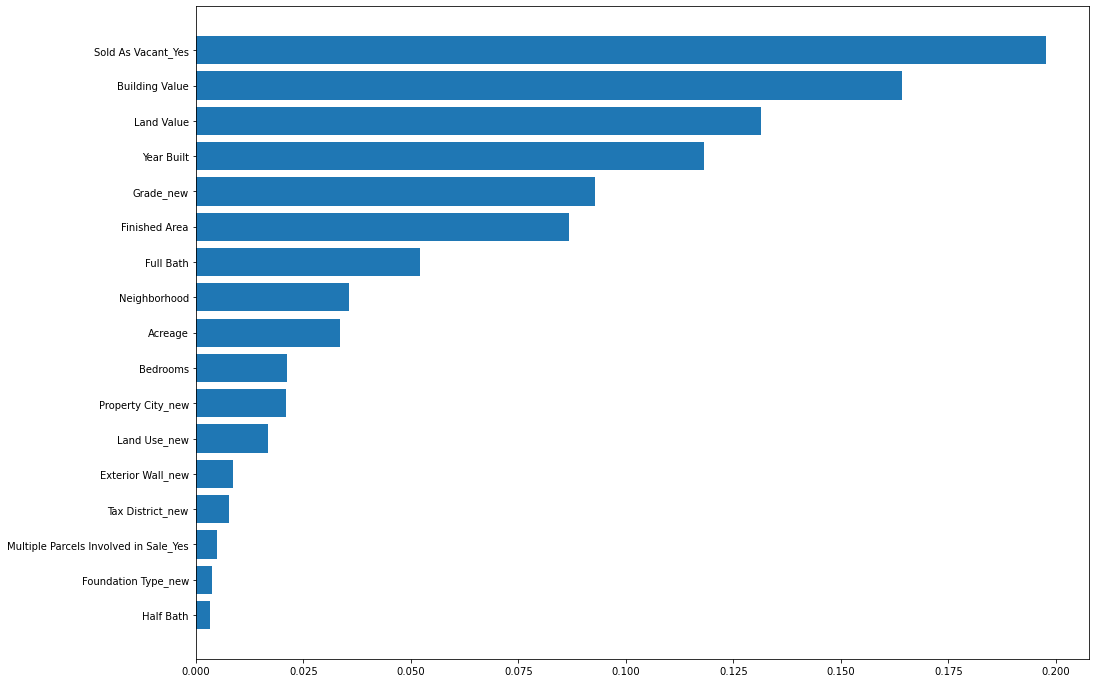

In [38]:
importances = RFM.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize =(16,12))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_trainRF.columns)[indices])

### Gradient Boosting


In [39]:
y = df[['Sale Price Compared To Value']]
X = df.drop(['Sale Price Compared To Value','Parcel ID','Legal Reference','Sale Date','Property Address','State','Foundation Type','Exterior Wall','Grade'
            ,'Land Use','Property City','Tax District'],axis=1)
X_trainGB, X_testGB, y_trainGB, y_testGB = train_test_split(X,y, test_size=0.20,random_state=56)

In [40]:
GBM = GradientBoostingClassifier(random_state=42)   
GBM.fit(X_trainGB,y_trainGB)

GradientBoostingClassifier(random_state=42)

In [41]:
y_predGB = GBM.predict(X_testGB)
print(confusion_matrix(y_testGB, y_predGB))
print(classification_report(y_testGB, y_predGB))

[[3359   25]
 [1084   62]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3384
           1       0.71      0.05      0.10      1146

    accuracy                           0.76      4530
   macro avg       0.73      0.52      0.48      4530
weighted avg       0.75      0.76      0.67      4530



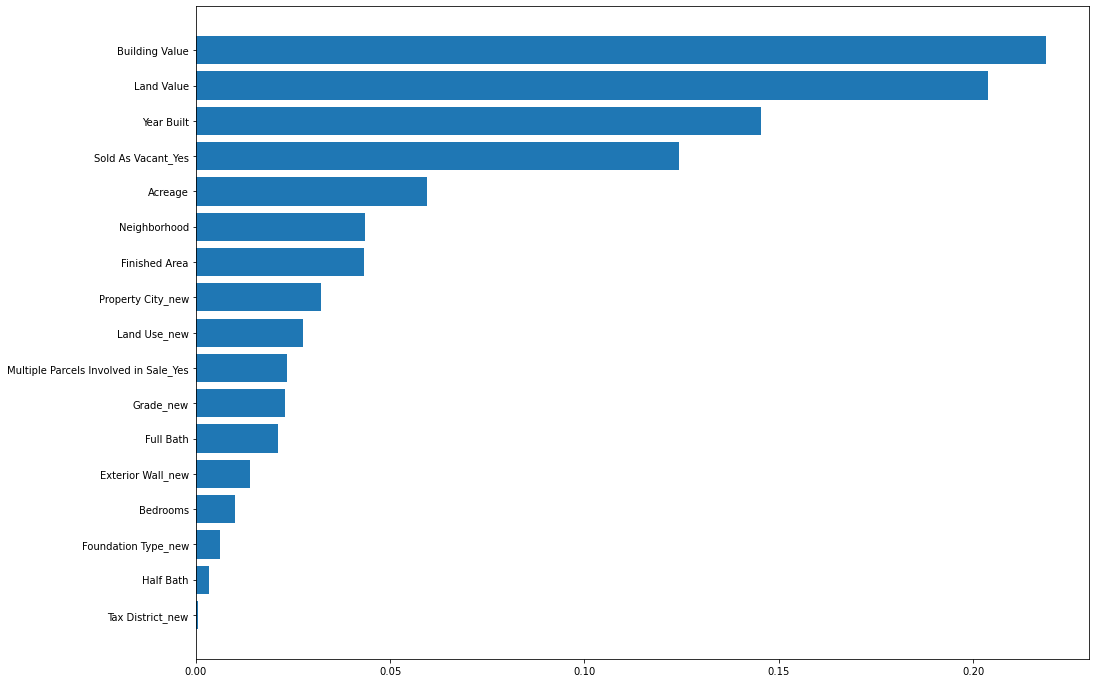

In [42]:
importances = GBM.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize =(16,12))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_trainRF.columns)[indices])